Simple process: let's say you have two populations. Split-ticket voters, and voters who vote using the straight ticket.

We assume Republican straight-ticket voters always vote for Trump.

Split-ticket voters instead have some small chance of voting for Trump, $p({trump})$.

In [1]:
p_trump = 0.30

Great now let's simulate a bunch of precincts with different fractions of straight-ticket Republican (R) voters.

We'll assume that all R-voters voted Trump.

In [2]:
import numpy as np
num_precincts = 1000 # let's deal with 1000 precincts.
r_percentages = np.random.rand(num_precincts)  # modeling the fraction of R voters in a precint, randomly from [0-1]

Now let's simulate some per-precinct votes and collect % of Trump votes from split-ticket voters.

This can be sampled a a bunch of weighted coinflips with the probability $p({trump})$--i.e, sampling from a binomial distribution.

In [3]:
# let's say we're dealing with a fixed size of split-ticket voters in each precinct
split_pop_size = 100 
split_votes = np.random.binomial(split_pop_size, p_trump, num_precincts) # simulating
split_trump_percentage = split_votes / split_pop_size

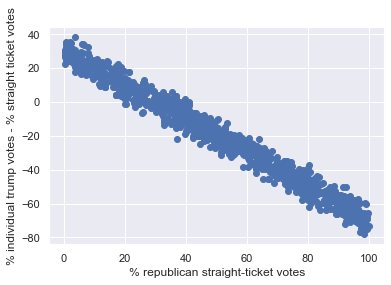

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

diffs = split_trump_percentage - r_percentages
plt.scatter(r_percentages*100, diffs*100) 
plt.xlabel('% republican straight-ticket votes')
plt.ylabel('% individual trump votes - % straight ticket votes')
plt.savefig('diff')

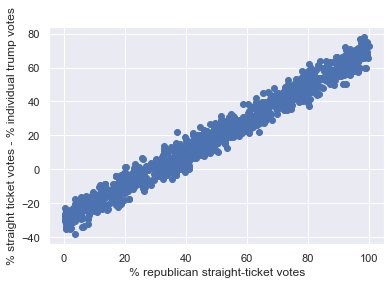

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

diffs = r_percentages - split_trump_percentage
plt.scatter(r_percentages*100, diffs*100) 
plt.xlabel('% republican straight-ticket votes')
plt.ylabel('% straight ticket votes - % individual trump votes')
plt.savefig('diff-2')

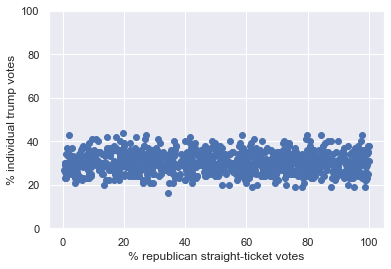

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

diffs = trump_percentage_among_non_republicans - r_percentages
plt.scatter(r_percentages*100, trump_percentage_among_non_republicans*100) 
plt.ylim([0,100])
plt.xlabel('% republican straight-ticket votes')
plt.ylabel('% individual trump votes')
plt.savefig('split')

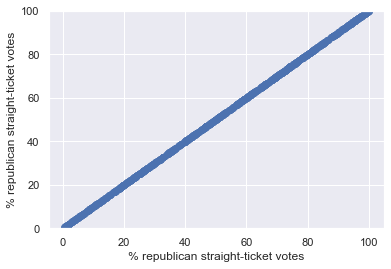

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

diffs = trump_percentage_among_non_republicans - r_percentages
plt.scatter(r_percentages*100, r_percentages*100) 
plt.ylim([0,100])
plt.xlabel('% republican straight-ticket votes')
plt.ylabel('% republican straight-ticket votes')
plt.savefig('straight')